PREPROCESSING

Import Libraries

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
from sklearn.preprocessing import LabelEncoder
import pickle
import os

In [47]:
# Define the folder containing the Excel files
folder_path = r"D:\Internship - Infosys\Project"

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is an Excel file (e.g., .xlsx or .xls)
    if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
        # Construct full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        
        # Create the corresponding CSV file name
        csv_file_name = os.path.splitext(file_name)[0] + ".csv"
        csv_file_path = os.path.join(folder_path, csv_file_name)
        
        # Save the DataFrame as a CSV file
        df.to_csv(csv_file_path, index=False)
        
        print(f"Converted {file_name} to {csv_file_name}")

print("All Excel files have been converted to CSV.")

Converted dataset4.xlsx to dataset4.csv
Converted dataset5.xlsx to dataset5.csv
Converted dataset6.xlsx to dataset6.csv
Converted dataset7.xlsx to dataset7.csv
Converted dataset8.xlsx to dataset8.csv
Converted dataset9.xlsx to dataset9.csv
Converted dataset_1_2_3_combined.xlsx to dataset_1_2_3_combined.csv
All Excel files have been converted to CSV.


Check the headers rows with reference header

In [48]:
# Define the folder containing the CSV files
folder_path = r"D:\Internship - Infosys\Project"

# Reference headers to compare
reference_headers = [
    "ID", "Name", "Role", "Transcript", "Resume", 
    "decision", "Reason for decision", 
    "Job Description", "num_words_in_transcript"
]

# Iterate through each CSV file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file
    if file_name.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read only the header row
        try:
            with open(file_path, 'r') as file:
                header_row = file.readline().strip().split(',')
            
            # Compare with the reference headers
            if header_row != reference_headers:
                print(f"\nHeader mismatch in file: {file_name}")
                print("File Headers: ", header_row)
                print("Reference Headers: ", reference_headers)
            else:
                print(f"Headers match for file: {file_name}")
        
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")

print("\nHeader comparison completed.")


Header mismatch in file: dataset4.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']
Reference Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']

Header mismatch in file: dataset5.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']
Reference Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']

Header mismatch in file: dataset6.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']
Reference Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']

Header mismatch in file: dataset7.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 

Convert all text to lowercase

In [49]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def convert_text_to_lowercase_bert(text):
    # Tokenize the text and convert it to lowercase
    tokens = tokenizer.tokenize(text)  # Tokenizing the input text
    lowercased_tokens = [token.lower() for token in tokens]  # Convert tokens to lowercase
    lowercased_text = tokenizer.convert_tokens_to_string(lowercased_tokens)  # Convert tokens back to text
    return lowercased_text

def convert_csv_to_lowercase_using_bert(folder_path):
    # Loop through all CSV files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing file: {file_name}")

            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)

            # Apply the BERT-based lowercase conversion to each string cell
            for col in df.select_dtypes(include=['object']).columns:  # Only process string columns
                df[col] = df[col].apply(convert_text_to_lowercase_bert)

            # Save the modified DataFrame back to the CSV
            df.to_csv(file_path, index=False)
            print(f"File '{file_name}' converted to lowercase using BERT!")

# Specify the folder containing the CSV files
folder_path = "D:\Internship - Infosys\Project"
convert_csv_to_lowercase_using_bert(folder_path)


Processing file: dataset4.csv
File 'dataset4.csv' converted to lowercase using BERT!
Processing file: dataset5.csv
File 'dataset5.csv' converted to lowercase using BERT!
Processing file: dataset6.csv
File 'dataset6.csv' converted to lowercase using BERT!
Processing file: dataset7.csv
File 'dataset7.csv' converted to lowercase using BERT!
Processing file: dataset8.csv
File 'dataset8.csv' converted to lowercase using BERT!
Processing file: dataset9.csv
File 'dataset9.csv' converted to lowercase using BERT!
Processing file: dataset_1_2_3_combined.csv
File 'dataset_1_2_3_combined.csv' converted to lowercase using BERT!


Add num_words_in_transcript in the data and find it

In [50]:
import spacy
import re

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define the folder containing the CSV files
folder_path = r"D:\Internship - Infosys\Project"

# Function to clean and calculate word count using SpaCy tokenizer
def get_word_count(text):
    # Handle empty text or NaN
    if not text or pd.isna(text):
        return 0
    
    # Remove unwanted punctuation like ellipses (...) and other non-word characters
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation like periods, commas, etc.
    
    # Ensure the input is a string and tokenize it
    doc = nlp(str(text))
    
    # Count all non-punctuation, non-whitespace tokens, and include contractions as single words
    word_count = len([token.text for token in doc if token.is_alpha and len(token.text) > 0])
    
    return word_count

# Iterate through each CSV file and process
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Load CSV into DataFrame
            df = pd.read_csv(file_path)
            
            # Ensure 'num_words_in_transcript' column is added
            if "num_words_in_transcript" not in df.columns:
                if "Transcript" in df.columns:
                    # Apply the word count function to each row of the 'Transcript' column
                    df["num_words_in_transcript"] = df["Transcript"].apply(lambda x: get_word_count(x) if pd.notna(x) else 0)
                else:
                    # If 'Transcript' column is missing, add NaN values
                    df["num_words_in_transcript"] = pd.NA

                # Save the updated DataFrame back to the file
                df.to_csv(file_path, index=False)
                print(f"Added 'num_words_in_transcript' column to {file_name}")
            else:
                print(f"'num_words_in_transcript' column already exists in {file_name}")
        
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

print("\nProcessing completed.")


Added 'num_words_in_transcript' column to dataset4.csv
Added 'num_words_in_transcript' column to dataset5.csv
Added 'num_words_in_transcript' column to dataset6.csv
Added 'num_words_in_transcript' column to dataset7.csv
Added 'num_words_in_transcript' column to dataset8.csv
Added 'num_words_in_transcript' column to dataset9.csv
'num_words_in_transcript' column already exists in dataset_1_2_3_combined.csv

Processing completed.


Update the decision column

In [51]:
def process_decision_column_in_folder(folder_path):
    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through each CSV file
    for csv_file in csv_files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, csv_file)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Replace 'selected' -> 'select' and 'rejected' -> 'reject' in the 'decision' column
        df['decision'] = df['decision'].replace({'selected': 'select', 'rejected': 'reject'})

        # Save the modified DataFrame back to CSV (overwriting the original or saving as new)
        df.to_csv(file_path, index=False)  # Overwrites the original file
        # Or you can save it as a new file if you prefer:
        # df.to_csv(f'processed_{csv_file}', index=False)

        print(f"Processed {csv_file} and updated 'decision' column.")

# Example usage:
folder_path = 'D:\Internship - Infosys\Project'  # Replace with your actual folder path
process_decision_column_in_folder(folder_path)


Processed dataset4.csv and updated 'decision' column.
Processed dataset5.csv and updated 'decision' column.
Processed dataset6.csv and updated 'decision' column.
Processed dataset7.csv and updated 'decision' column.
Processed dataset8.csv and updated 'decision' column.
Processed dataset9.csv and updated 'decision' column.
Processed dataset_1_2_3_combined.csv and updated 'decision' column.


Concatinate all the dataset to a single dataset

In [52]:
import os
import pandas as pd

def concatenate_datasets_from_folder(folder_path):
    # Initialize an empty list to store the dataframes
    dataframes = []

    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through each CSV file
    for csv_file in csv_files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, csv_file)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Append the DataFrame to the list
        dataframes.append(df)

    # Concatenate all the dataframes into one single dataframe
    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df

# Example usage:
folder_path = 'D:\Internship - Infosys\Project'  # Replace with your actual folder path

# Get the combined dataset
final_combined_df = concatenate_datasets_from_folder(folder_path)

# Display the final concatenated DataFrame
print(final_combined_df)
final_combined_df.to_csv('combined_dataset.csv', index=False)


             ID              Name               Role  \
0       uppaup1       alice smith  software engineer   
1       uppaup2        hank brown  software engineer   
2       uppaup3         bob jones     data scientist   
3       uppaup4        bob miller  software engineer   
4       uppaup5         ivy jones      data engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     here ' s a simulated interview for a software ...   
1     here ' s a simulated interview for a software ...   
2     here ' s a simulated interview for a data scie...   
3     here ' s a simulated interview for a software ...   
4     here ' s a simulated inter

Change the roles

In [91]:
data2 = pd.read_csv('combined_dataset.csv')

# Define mapping for combining roles
role_mapping = {
    'product manager': 'Product Manager',
    'project manager': 'Product Manager',
    
    'software engineer': 'Software Engineer',
    'software developer': 'Software Engineer',
    'devops engineer': 'Software Engineer',
    'system administrator': 'Software Engineer',
    'game developer': 'Software Engineer',
    'mobile app developer': 'Software Engineer',
    'cloud architect': 'Software Engineer',
    'ai engineer': 'Software Engineer',
    
    'data analyst': 'Data Analyst',
    'business analyst': 'Data Analyst',
    'digital marketing specialist': 'Data Analyst',
    
    'data scientist': 'Data Scientist',
    'machine learning engineer': 'Data Scientist',
    
    'data engineer': 'Data Engineer',
    'database administrator': 'Data Engineer',
    'cloud architect': 'Data Engineer',
    
    'ui designer': 'UI Designer',
    'ui engineer': 'UI Designer',
    'ui / ux designer': 'UI Designer',
    'graphic designer': 'UI Designer',
    
    'cybersecurity specialist': 'Cybersecurity Specialist',
    'content writer': 'Content Writer',
    'hr specialist': 'HR Specialist',
    'network engineer': 'Network Engineer'
}

# Apply the mapping to the dataset
data2['Role'] = data2['Role'].map(role_mapping)

data2.to_csv('combined_dataset.csv')

Descriptive Statistics

Numerical Features -> num_words_in_transcript

In [92]:

def load_and_aggregate(file_name):
    aggregated_dfs = []  # List to hold all aggregated DataFrames
    
    # Loop through all files in the folder
    df = pd.read_csv(file_name)  # Read the CSV file
            
            # Perform the aggregation on the DataFrame
    aggregated_df = df[['num_words_in_transcript', 'decision', 'Role']].groupby(['Role', 'decision']).agg(
    mean=('num_words_in_transcript', 'mean'),
    median=('num_words_in_transcript', 'median'),
    std=('num_words_in_transcript', 'std'),
    min=('num_words_in_transcript', 'min'),
    max=('num_words_in_transcript', 'max')
    ).reset_index()
            
    aggregated_dfs.append(aggregated_df)  # Add to the list
    
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(aggregated_dfs, ignore_index=True)
    
    return combined_df

# Usage
file_name = 'combined_dataset.csv'  # Replace with your actual folder path
result = load_and_aggregate(file_name)

# Convert the result to a DataFrame (it already is a DataFrame)
result_df = pd.DataFrame(result)


result_df.to_csv('aggregate.csv')

In [93]:
result_df

,Role,decision,mean,median,std,min,max
0,Content Writer,reject,558.333333,560.0,71.514567,486,629
1,Content Writer,select,709.500000,709.5,36.062446,684,735
2,Cybersecurity Specialist,reject,659.666667,630.0,128.570085,552,897
3,Cybersecurity Specialist,select,723.666667,688.0,82.500505,665,818
4,Data Analyst,reject,683.020979,687.0,103.363537,373,896
5,Data Analyst,select,769.783217,760.0,108.543763,563,1212
6,Data Engineer,reject,648.836431,639.0,113.636249,428,1101
7,Data Engineer,select,754.720648,768.0,128.880132,438,1139
8,Data Scientist,reject,663.197324,660.0,111.742173,272,1006
9,Data Scientist,select,750.180887,749.0,135.956372,85,1250


Categorical Features -> Role

                       Role  Frequency
0         Software Engineer        649
1            Data Scientist        592
2           Product Manager        562
3               UI Designer        527
4             Data Engineer        516
5              Data Analyst        286
6          Network Engineer         16
7             HR Specialist         12
8  Cybersecurity Specialist          9
9            Content Writer          5


<Figure size 1000x600 with 0 Axes>

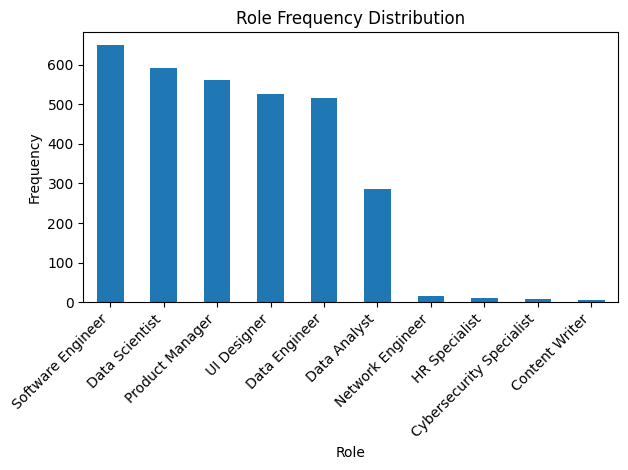

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data and calculate role frequency distribution
def calculate_role_frequency(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Count the frequency of each role
    role_count = df['Role'].value_counts()
    
    # Convert the series into a DataFrame for easier handling
    role_frequency_df = role_count.reset_index()
    role_frequency_df.columns = ['Role', 'Frequency']
    
    return role_frequency_df

# Usage
file_name = 'combined_dataset.csv'  # Replace with your actual file path
role_frequency_df = calculate_role_frequency(file_name)

# Display the frequency distribution as a table
print(role_frequency_df)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
role_frequency_df.sort_values(by='Frequency', ascending=False).plot(kind='bar', x='Role', y='Frequency', legend=False)
plt.title('Role Frequency Distribution')
plt.xlabel('Role')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Transcript Sentiment

Sentiment  Negative  Positive
decision                     
reject          1.0    1608.0
select          0.0    1565.0


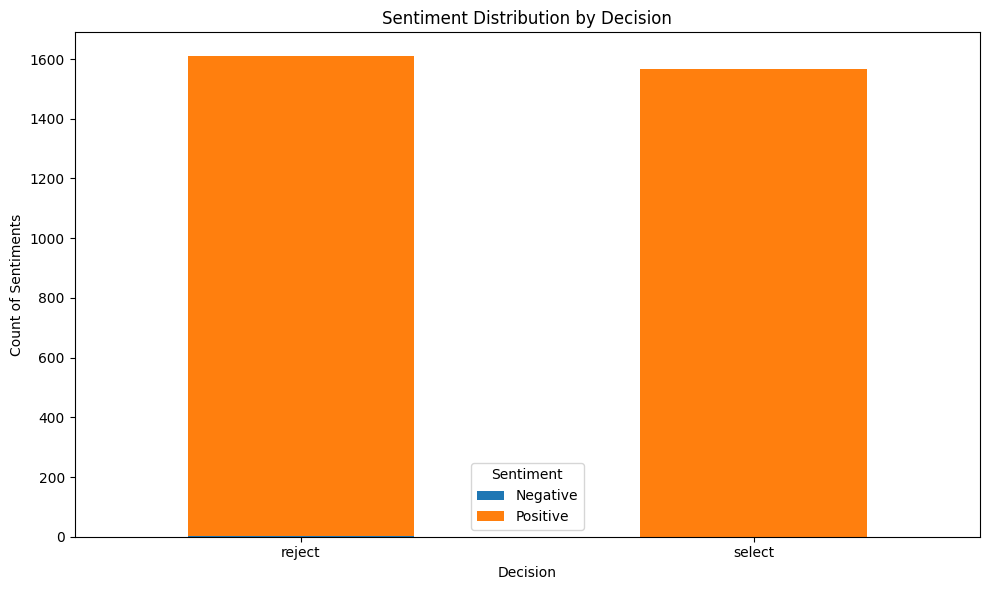

In [95]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Function to perform sentiment analysis
def perform_sentiment_analysis(df, transcript_column='Transcript'):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Apply sentiment analysis to the 'Transcript' column
    df['Sentiment Score'] = df[transcript_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    
    # Categorize the sentiment into Positive, Negative, and Neutral
    df['Sentiment'] = df['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    
    return df

# Function to analyze sentiment distribution based on decision
def analyze_sentiment_by_decision(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Perform sentiment analysis on the Transcript column
    df = perform_sentiment_analysis(df)
    
    # Group by Decision and Sentiment to count occurrences
    sentiment_by_decision = df.groupby(['decision', 'Sentiment']).size().unstack().fillna(0)
    
    return df, sentiment_by_decision

# Usage
file_name = 'combined_dataset.csv'  # Replace with your actual file path
df, sentiment_by_decision = analyze_sentiment_by_decision(file_name)

# Display sentiment analysis result by decision
print(sentiment_by_decision)

# Plot sentiment distribution by decision
sentiment_by_decision.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Decision')
plt.xlabel('Decision')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The vast majority of transcripts are classified as having a positive sentiment, with very few classified as negative sentiment, and no neutral sentiment at all.

[nltk_data] Downloading package stopwords to C:\Users\Durgesh
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


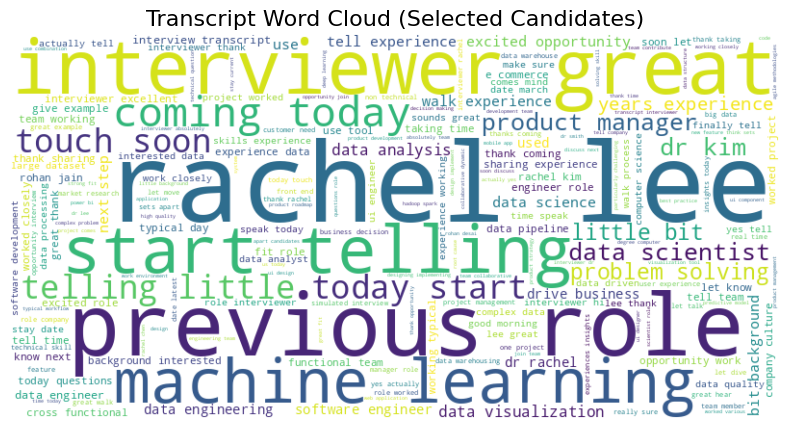

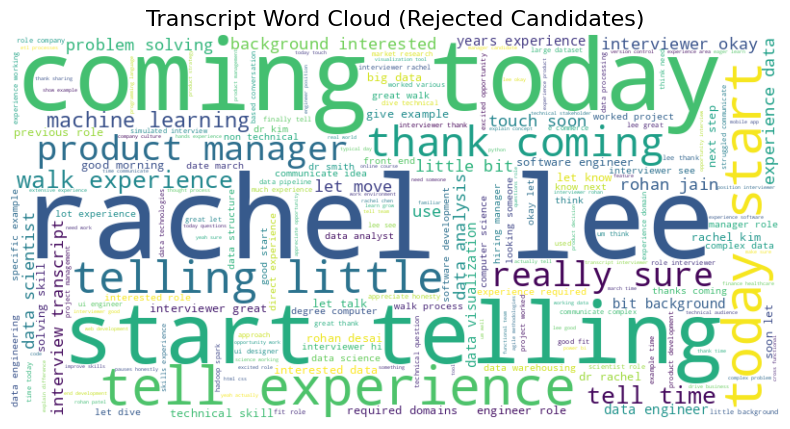

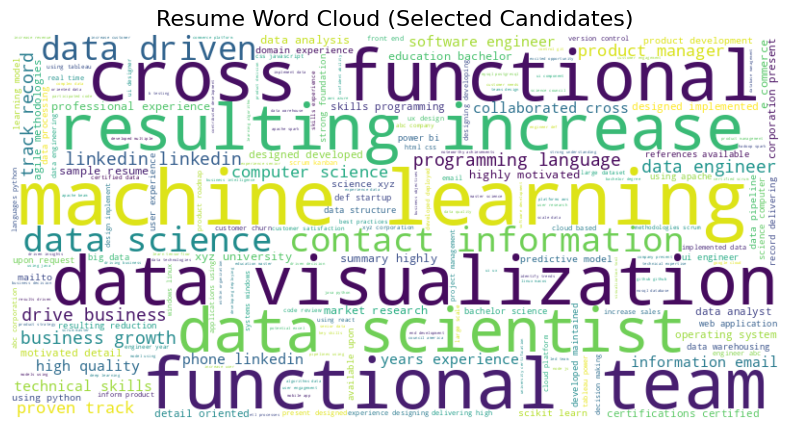

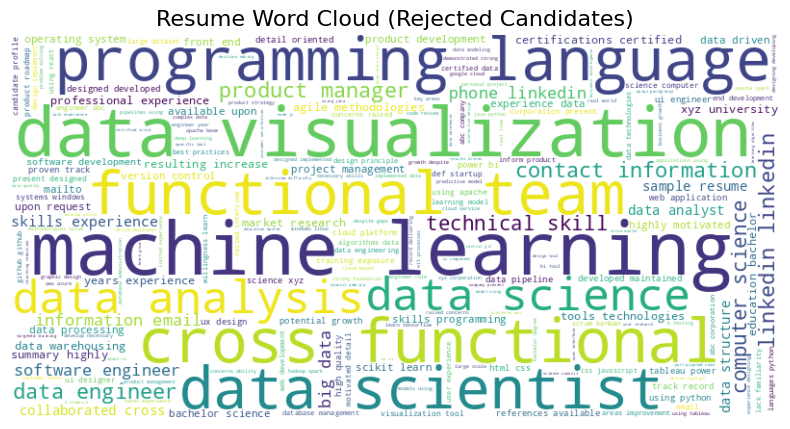

In [96]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Remove stop words, convert to lowercase, and remove non-alphabetic characters
    return ' '.join(word.lower() for word in str(text).split() if word.lower() not in stop_words and word.isalpha())

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Function to create word clouds for selected and rejected candidates
def create_word_clouds(file_name):
    # Load data
    df = pd.read_csv(file_name)

    # Preprocess text columns
    df['Transcript Cleaned'] = df['Transcript'].apply(preprocess_text)
    df['Resume Cleaned'] = df['Resume'].apply(preprocess_text)

    # Split data by decision
    selected = df[df['decision'] == 'select']
    rejected = df[df['decision'] == 'reject']

    # Generate word clouds for each group and column
    for column, title_prefix in [('Transcript Cleaned', 'Transcript'), ('Resume Cleaned', 'Resume')]:
        generate_word_cloud(' '.join(selected[column]), f'{title_prefix} Word Cloud (Selected Candidates)')
        generate_word_cloud(' '.join(rejected[column]), f'{title_prefix} Word Cloud (Rejected Candidates)')

# Usage
file_name = 'combined_dataset.csv'  # Replace with the path to your dataset
create_word_clouds(file_name)


The transcript of selected students has the words like {experience, previous role, skills, tools, problem solving and the words that are more related to the job }
The transcript of rejected students has only the normal verbal words which are not related to industry. This also shows that the candidate only knows about the title of job role and not much about it
In Resume, the selected candidate has given more skillsets in the resume than the rejected candidate 

In [97]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('combined_dataset.csv')  # Replace with your dataset path

# Function to calculate cultural fit score
def calculate_cultural_fit(df):
    # Extract relevant columns
    transcripts = df['Transcript'].fillna('')  # Candidate responses
    job_descriptions = df['Job Description'].fillna('')  # Role expectations

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Combine both columns for TF-IDF training
    all_texts = pd.concat([transcripts, job_descriptions], axis=0)
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    # Split back into transcripts and job descriptions
    transcripts_tfidf = tfidf_matrix[:len(transcripts)]
    job_descriptions_tfidf = tfidf_matrix[len(transcripts):]

    # Calculate cosine similarity between transcripts and job descriptions
    similarity_scores = []
    for i in range(len(transcripts)):
        similarity = cosine_similarity(transcripts_tfidf[i], job_descriptions_tfidf[i])
        similarity_scores.append(similarity[0][0])

    # Add the scores to the DataFrame
    df['Cultural_Fit_Score'] = similarity_scores

    return df

# Calculate the cultural fit score
df_with_scores = calculate_cultural_fit(df)

# Save the result
df_with_scores.to_csv('cultural_fit_scores.csv', index=False)

# Print sample output
print(df_with_scores[['Role', 'Cultural_Fit_Score', 'decision']].head())


                Role  Cultural_Fit_Score decision
0  Software Engineer            0.156612   reject
1  Software Engineer            0.167583   select
2     Data Scientist            0.186347   reject
3  Software Engineer            0.222087   select
4      Data Engineer            0.266225   reject


C:\Users\Durgesh Babu\AppData\Local\Temp\ipykernel_14652\570331758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_scores, x='decision', y='Cultural_Fit_Score', palette='Set2')


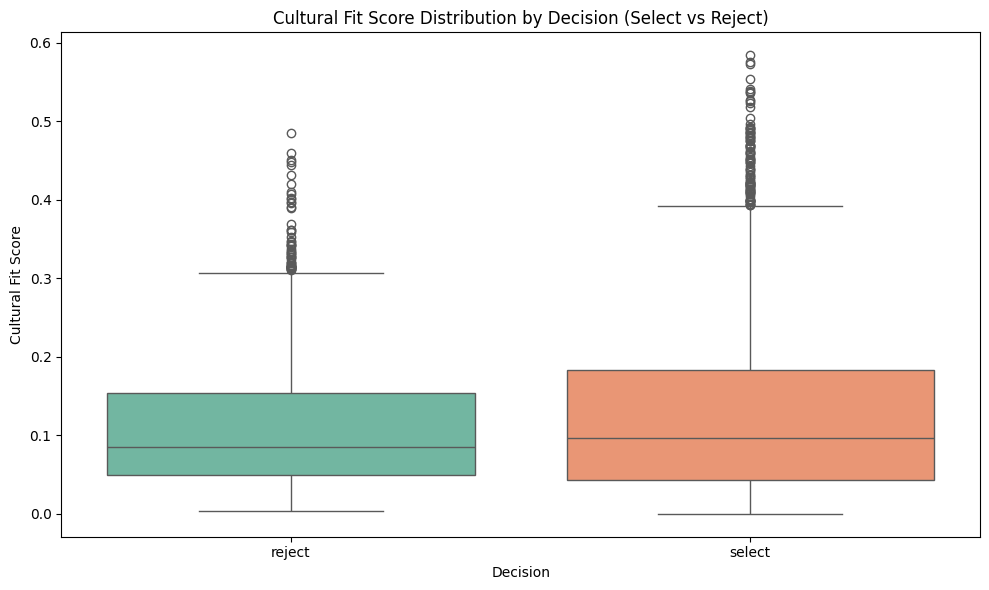

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the cultural fit score for selected vs rejected candidates
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_with_scores, x='decision', y='Cultural_Fit_Score', palette='Set2')
plt.title('Cultural Fit Score Distribution by Decision (Select vs Reject)')
plt.xlabel('Decision')
plt.ylabel('Cultural Fit Score')
plt.tight_layout()
plt.show()


In [99]:
# Group by decision and calculate mean and median of cultural fit scores
stats = df_with_scores.groupby('decision')['Cultural_Fit_Score'].agg(['mean', 'median'])
print(stats)


              mean    median
decision                    
reject    0.111165  0.085081
select    0.134640  0.096881


In [100]:
from scipy.stats import ttest_ind

# Separate the scores for "select" and "reject" candidates
select_scores = df_with_scores[df_with_scores['decision'] == 'select']['Cultural_Fit_Score']
reject_scores = df_with_scores[df_with_scores['decision'] == 'reject']['Cultural_Fit_Score']

# Perform the t-test
t_stat, p_value = ttest_ind(select_scores, reject_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 6.438083220608945
P-value: 1.392656520104574e-10


The difference in cultural fit scores between candidates who are selected and those who are rejected is statistically significant. Since the p-value is very small (much less than the typical threshold of 0.05), we can reject the null hypothesis.  A higher t-statistic suggests a larger difference between the two groups.

In [101]:
import pandas as pd


df = pd.read_csv('cultural_fit_scores.csv')

# Step 1: Group by 'Role' and 'decision', and calculate the min, mean, median of the 'Cultural Fit Score'
grouped_df = df.groupby(['Role', 'decision'])['Cultural_Fit_Score'].agg(['min', 'mean', 'median'])

# Step 2: Reset index to convert multi-level indices into columns
grouped_df = grouped_df.reset_index()

# Step 3: Pivot the table so that 'decision' values become separate columns
pivot_df = grouped_df.pivot_table(index='Role', columns='decision', values=['min', 'mean', 'median'])

# Step 4: Flatten the multi-level columns resulting from pivot
pivot_df.columns = [f'{stat}_{decision}' for stat, decision in pivot_df.columns]

# Step 5: Print the final DataFrame
data = pd.DataFrame(pivot_df)
data


,mean_reject,mean_select,median_reject,median_select,min_reject,min_select
Role,,,,,,
Content Writer,0.403656,0.493132,0.432141,0.493132,0.330503,0.412817
Cybersecurity Specialist,0.186207,0.347482,0.151037,0.335344,0.123955,0.298023
Data Analyst,0.067974,0.084389,0.052877,0.051681,0.011617,0.003219
Data Engineer,0.131084,0.170618,0.103116,0.108221,0.015242,0.000000
Data Scientist,0.103805,0.122241,0.095879,0.102858,0.012344,0.003111
HR Specialist,0.295935,0.337610,0.284612,0.335103,0.186052,0.246901
Network Engineer,0.263190,0.394019,0.227075,0.363601,0.150299,0.254701
Product Manager,0.140420,0.150585,0.111186,0.114512,0.012511,0.011559
Software Engineer,0.086316,0.114231,0.074365,0.075222,0.003264,0.002195


Roles like data analyst and software engineer show smaller mean differences between selected and rejected candidates, suggesting that candidates with varying levels of Cultural Fit can still be selected.
For most roles, the mean is higher than the median, which might indicate a skewed distribution
The minimum for selected candidates in data analyst role is extremely low (0.003219), suggesting that even candidates with very low Cultural Fit Scores are sometimes selected.
Higher Cultural Fit Scores seem to play a stronger role in selection decisions for certain roles

In [102]:
combined_dataset = pd.read_csv('cultural_fit_scores.csv')
# Step 1: Calculate the length of Transcript and Resume
combined_dataset['Transcript Length'] = combined_dataset['Transcript'].apply(lambda x: len(x.split()))
combined_dataset['Resume Length'] = combined_dataset['Resume'].apply(lambda x: len(x.split()))

# Step 2: Calculate the Transcript Length to Resume Length Ratio
combined_dataset['Transcript to Resume Length Ratio'] = combined_dataset['Transcript Length'] / combined_dataset['Resume Length']

# Step 3: Calculate Cultural Fit Score to Transcript/Resume Length Ratio
combined_dataset['Cultural Fit to Transcript Length Ratio'] = combined_dataset['Cultural_Fit_Score'] / combined_dataset['Transcript Length']
combined_dataset['Cultural Fit to Resume Length Ratio'] = combined_dataset['Cultural_Fit_Score'] / combined_dataset['Resume Length']

# Step 4: Correlation with Selection Decision (selected = 1, rejected = 0)
# Assuming 'decision' is the column with selection results (1 = selected, 0 = rejected)
decision_map = {'select': 1, 'reject': 0}
combined_dataset['decision_numeric'] = combined_dataset['decision'].map(decision_map)

# Step 5: Calculate correlation for the ratios with the decision
correlations = combined_dataset[['Transcript to Resume Length Ratio', 'Cultural Fit to Transcript Length Ratio', 'Cultural Fit to Resume Length Ratio', 'decision_numeric']].corr()

# Display the correlations
data = pd.DataFrame(correlations)
data


,Transcript to Resume Length Ratio,Cultural Fit to Transcript Length Ratio,Cultural Fit to Resume Length Ratio,decision_numeric
Transcript to Resume Length Ratio,1.000000,-0.030853,0.630458,0.068435
Cultural Fit to Transcript Length Ratio,-0.030853,1.000000,0.605333,0.028237
Cultural Fit to Resume Length Ratio,0.630458,0.605333,1.000000,0.088295
decision_numeric,0.068435,0.028237,0.088295,1.000000


The correlations with decision_numeric are all weak, suggesting that Cultural Fit relative to length and Transcript to Resume Length Ratio have a minor role in the final decision-making process.

FEATURE EXTRACTION

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
from sklearn.preprocessing import LabelEncoder
import pickle

In [104]:
data = pd.read_csv('combined_dataset.csv')
data

,Unnamed: 0,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript
0,0,uppaup1,alice smith,Software Engineer,here ' s a simulated interview for a software ...,here ' s a sample resume for alice smith : * *...,reject,unsatisfactory references or background check .,here is a comprehensive job description for a ...,586
1,1,uppaup2,hank brown,Software Engineer,here ' s a simulated interview for a software ...,"here ' s a resume for hank brown , a selected ...",select,growth mindset and adaptability .,here is a job description for a software engin...,853
2,2,uppaup3,bob jones,Data Scientist,here ' s a simulated interview for a data scie...,"here ' s a sample resume for bob jones , who a...",reject,inadequate communication or interpersonal skil...,here is a comprehensive job description for a ...,534
3,3,uppaup4,bob miller,Software Engineer,here ' s a simulated interview for a software ...,"here ' s a sample resume for bob miller , a so...",select,strong cultural fit .,here is a sample job description for a softwar...,715
4,4,uppaup5,ivy jones,Data Engineer,here ' s a simulated interview for a data engi...,here ' s a sample resume for ivy jones : * * i...,reject,lack of relevant skills or experience .,here is a sample job description for a data en...,620
...,...,...,...,...,...,...,...,...,...,...
3169,3169,ananba44,ananya bansal,Data Engineer,here ' s a realistic interview transcript for ...,ananya bansal contact information : * phone : ...,select,experience gap,we are seeking a qualified data engineer with ...,786
3170,3170,diyasi576,diya singh,Product Manager,interview transcript for product manager role ...,diya singh contact information : * email : [ d...,reject,business acumen,we are seeking a qualified product manager wit...,735
3171,3171,harska507,harshitha kapoor,UI Designer,"interviewer : hi harshitha , thanks for coming...",harshitha kapoor ui engineer contact informati...,select,cultural fit,we are seeking a qualified ui engineer with de...,913
3172,3172,kabich225,kabir chopra,Software Engineer,here ' s a realistic interview transcript for ...,kabir chopra contact information : * email : [...,reject,technical knowledge,we are seeking a qualified software engineer w...,806


In [105]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               3174 non-null   int64 
 1   ID                       3174 non-null   object
 2   Name                     3174 non-null   object
 3   Role                     3174 non-null   object
 4   Transcript               3174 non-null   object
 5   Resume                   3174 non-null   object
 6   decision                 3174 non-null   object
 7   Reason for decision      3174 non-null   object
 8   Job Description          3174 non-null   object
 9   num_words_in_transcript  3174 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 248.1+ KB


,Unnamed: 0,num_words_in_transcript
count,3174.000000,3174.000000
mean,1586.500000,699.766856
std,916.399203,138.352773
min,0.000000,64.000000
25%,793.250000,598.250000
50%,1586.500000,699.000000
75%,2379.750000,796.000000
max,3173.000000,1254.000000


In [106]:
# Checking for missing values
data.isnull().sum()

Unnamed: 0                 0
ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason for decision        0
Job Description            0
num_words_in_transcript    0
dtype: int64

In [107]:
# Calculate resume and job description similarity (Cosine Similarity)
vectorizer = TfidfVectorizer()
resume_jd_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    jd = data['Job Description'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, jd]))[0, 1]
    resume_jd_similarity.append(similarity)
data['resume_jd_similarity'] = resume_jd_similarity

In [108]:
# Calculate resume and transcript similarity (Cosine Similarity)
resume_transcript_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    transcript = data['Transcript'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, transcript]))[0, 1]
    resume_transcript_similarity.append(similarity)
data['resume_transcript_similarity'] = resume_transcript_similarity

In [109]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Lists to store sentiment results
sentiments = []
polarity = []

# Perform sentiment analysis on each transcript
for i in range(len(data)):
    transcript = data['Transcript'][i]
    sentiment_score = sia.polarity_scores(transcript)
    sentiments.append(sentiment_score['compound'])  # Compound sentiment score
    polarity.append('positive' if sentiment_score['compound'] > 0 
                    else 'negative' if sentiment_score['compound'] < 0 
                    else 'neutral')

# Add the results to the DataFrame
data['sentiment'] = sentiments
data['polarity'] = polarity

# Count of each sentiment category
polarity_counts = data['polarity'].value_counts()
print("\n2. Sentiment Polarity Distribution:")
for polarity, count in polarity_counts.items():
    print(f"   - {polarity.capitalize()}: {count} occurrences ({(count / len(data) * 100):.2f}%)")

# Overall average sentiment score
average_sentiment = data['sentiment'].mean()
print(f"\n3. Overall Average Sentiment Score: {average_sentiment:.2f}")
if average_sentiment > 0:
    print("   - The overall sentiment of the transcripts is positive.")
elif average_sentiment < 0:
    print("   - The overall sentiment of the transcripts is negative.")
else:
    print("   - The overall sentiment of the transcripts is neutral.")


2. Sentiment Polarity Distribution:
   - Positive: 3173 occurrences (99.97%)
   - Negative: 1 occurrences (0.03%)

3. Overall Average Sentiment Score: 1.00
   - The overall sentiment of the transcripts is positive.


In [110]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Compute lexical diversity for each transcript
data['lexical_diversity'] = data['Transcript'].apply(lexical_diversity)

# Calculate statistics
average_diversity = data['lexical_diversity'].mean()

In [111]:
# Length of transcript (number of words)
data['transcript_length'] = data['Transcript'].apply(lambda x: len(x.split()))

# Calculate statistics
average_length = data['transcript_length'].mean()
min_length = data['transcript_length'].min()
max_length = data['transcript_length'].max()

In [112]:
# Encoding the target variable (select/reject)
le = LabelEncoder()
data['decision'] = le.fit_transform(data['decision'])  # 0: reject, 1: select

In [113]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Job Description']), axis=1)

In [114]:
#Soft Skills
from textblob import TextBlob

data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [115]:
# Resume length (number of words)
data['resume_length'] = data['Resume'].apply(lambda x: len(x.split()))

In [116]:
# Job Description Experience Match (Simple matching based on keywords, could be improved)
data['job_description_experience_match'] = data.apply(lambda row: len(set(row['Resume'].split()) & set(row['Job Description'].split())), axis=1)

In [117]:
#Cultural fit sentiment
data['cultural_fit_sentiment'] = data['Reason for decision'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [118]:
#job score
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job Description'], row['Transcript']), axis=1)

In [119]:
import re

# Define a function to calculate the confidence score
def calculate_confidence_score(text):
    # Count occurrences of "I think" and "Maybe" (case-insensitive)
    confidence_phrases = re.findall(r'\b(I think|Maybe)\b', text, flags=re.IGNORECASE)
    return len(confidence_phrases)

# Apply the function to calculate confidence scores
data['confidence_score'] = data['Transcript'].apply(calculate_confidence_score)


In [120]:
#job description complexity
data['job_desc_complexity'] = data['Job Description'].apply(lambda x: textstat.flesch_reading_ease(x))

In [121]:
#interaction quality
data['interaction_quality'] = data['num_words_in_transcript'] * data['sentiment']

In [122]:
data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))

In [123]:
# Text complexity (resume and transcript - using a simple metric like Flesch Reading Ease)
def text_complexity(text):
    # Implement text complexity (e.g., Flesch Reading Ease)
    # Here's a placeholder function:
    return len(text.split()) / len(set(text.split()))  # A basic metric

data['text_complexity_transcript'] = data['Transcript'].apply(text_complexity)
data['text_complexity_resume'] = data['Resume'].apply(text_complexity)

In [124]:
data.to_csv('new_combined_data.csv')

In [125]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [126]:
data

,Unnamed: 0,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript,...,resume_length,job_description_experience_match,cultural_fit_sentiment,job_fit_score,confidence_score,job_desc_complexity,interaction_quality,clarity_score,text_complexity_transcript,text_complexity_resume
0,0,uppaup1,alice smith,Software Engineer,here ' s a simulated interview for a software ...,here ' s a sample resume for alice smith : * *...,0,unsatisfactory references or background check .,here is a comprehensive job description for a ...,586,...,584,100,0.000000,0.102703,6,-23.75,585.0038,76.52,3.431535,2.246154
1,1,uppaup2,hank brown,Software Engineer,here ' s a simulated interview for a software ...,"here ' s a resume for hank brown , a selected ...",1,growth mindset and adaptability .,here is a job description for a software engin...,853,...,631,47,0.000000,0.223629,1,30.20,852.6588,53.00,3.270270,2.445736
2,2,uppaup3,bob jones,Data Scientist,here ' s a simulated interview for a data scie...,"here ' s a sample resume for bob jones , who a...",0,inadequate communication or interpersonal skil...,here is a comprehensive job description for a ...,534,...,658,103,0.000000,0.099248,3,15.24,532.2378,75.50,2.843373,2.580392
3,3,uppaup4,bob miller,Software Engineer,here ' s a simulated interview for a software ...,"here ' s a sample resume for bob miller , a so...",1,strong cultural fit .,here is a sample job description for a softwar...,715,...,604,90,0.311111,0.182410,0,-49.73,713.8560,65.12,3.334532,2.626087
4,4,uppaup5,ivy jones,Data Engineer,here ' s a simulated interview for a data engi...,here ' s a sample resume for ivy jones : * * i...,0,lack of relevant skills or experience .,here is a sample job description for a data en...,620,...,688,87,0.400000,0.088398,4,-34.51,618.0160,64.61,3.456067,3.044248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,3169,ananba44,ananya bansal,Data Engineer,here ' s a realistic interview transcript for ...,ananya bansal contact information : * phone : ...,1,experience gap,we are seeking a qualified data engineer with ...,786,...,474,16,0.000000,0.500000,2,28.33,784.8996,65.73,3.262500,2.821429
3170,3170,diyasi576,diya singh,Product Manager,interview transcript for product manager role ...,diya singh contact information : * email : [ d...,0,business acumen,we are seeking a qualified product manager wit...,735,...,473,18,0.000000,0.568182,4,26.81,734.4120,53.21,2.845659,2.798817
3171,3171,harska507,harshitha kapoor,UI Designer,"interviewer : hi harshitha , thanks for coming...",harshitha kapoor ui engineer contact informati...,1,cultural fit,we are seeking a qualified ui engineer with de...,913,...,503,20,0.250000,0.533333,0,26.30,912.6348,64.61,3.032432,2.704301
3172,3172,kabich225,kabir chopra,Software Engineer,here ' s a realistic interview transcript for ...,kabir chopra contact information : * email : [...,0,technical knowledge,we are seeking a qualified software engineer w...,806,...,393,17,0.000000,0.536585,1,27.83,804.9522,55.64,3.000000,2.353293


In [127]:
data = pd.read_csv('new_combined_data.csv')

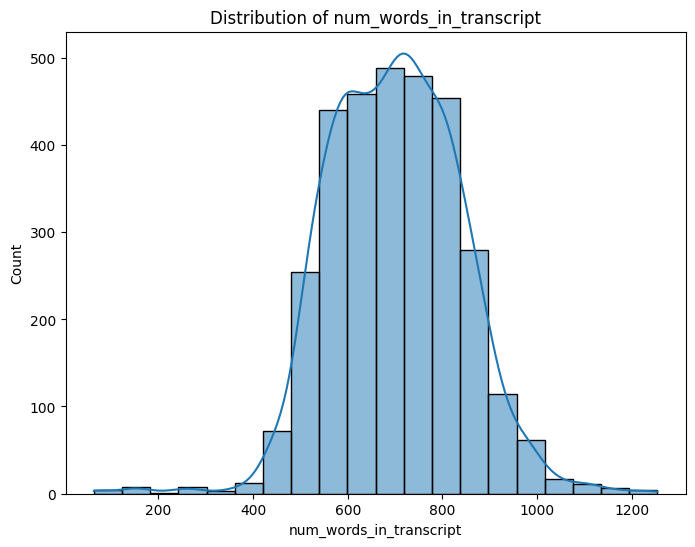

--- Summary of num_words_in_transcript Distribution ---
   - Mean: 699.77
   - Median: 699.00
   - Standard Deviation: 138.35
   - The distribution of num_words_in_transcript is positively skewed.
   - num_words_in_transcript appears to have a skewed distribution.
   ----------------------------------------------------



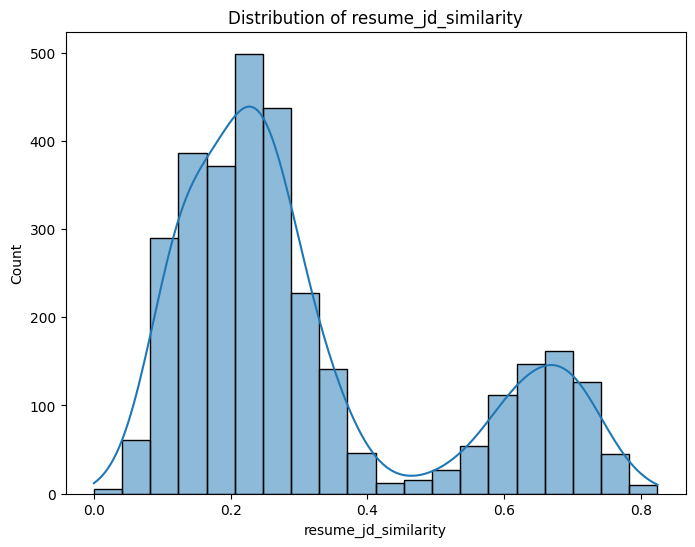

--- Summary of resume_jd_similarity Distribution ---
   - Mean: 0.31
   - Median: 0.24
   - Standard Deviation: 0.20
   - The distribution of resume_jd_similarity is positively skewed.
   - resume_jd_similarity appears to have a normal distribution.
   ----------------------------------------------------



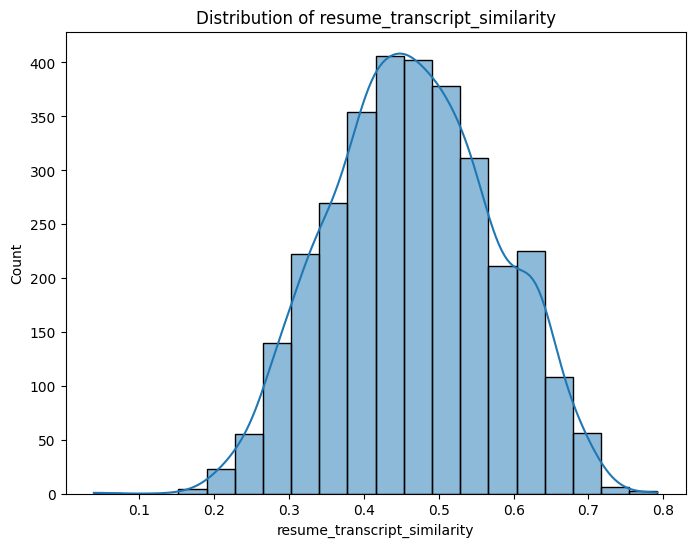

--- Summary of resume_transcript_similarity Distribution ---
   - Mean: 0.47
   - Median: 0.46
   - Standard Deviation: 0.11
   - The distribution of resume_transcript_similarity is positively skewed.
   - resume_transcript_similarity appears to have a normal distribution.
   ----------------------------------------------------



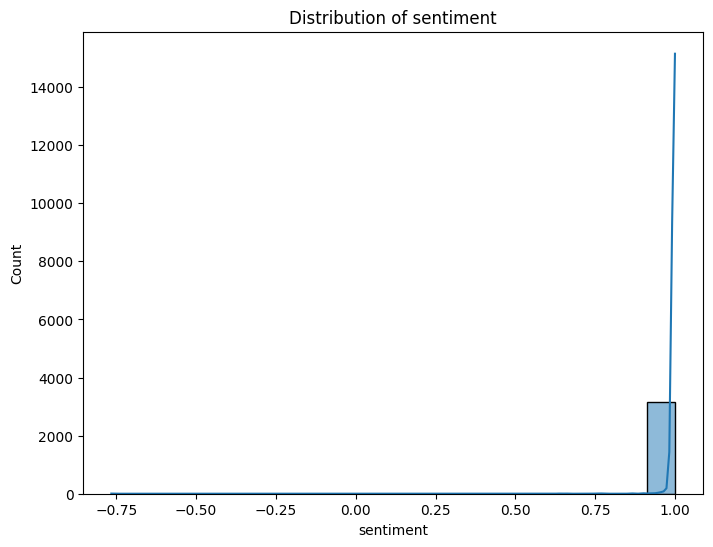

--- Summary of sentiment Distribution ---
   - Mean: 1.00
   - Median: 1.00
   - Standard Deviation: 0.03
   - The distribution of sentiment is negatively skewed.
   - sentiment appears to have a normal distribution.
   ----------------------------------------------------



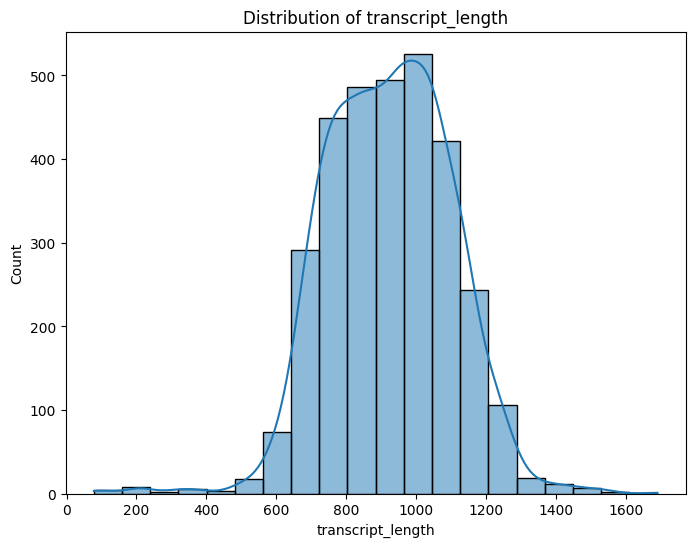

--- Summary of transcript_length Distribution ---
   - Mean: 923.22
   - Median: 926.50
   - Standard Deviation: 178.09
   - The distribution of transcript_length is negatively skewed.
   - transcript_length appears to have a skewed distribution.
   ----------------------------------------------------



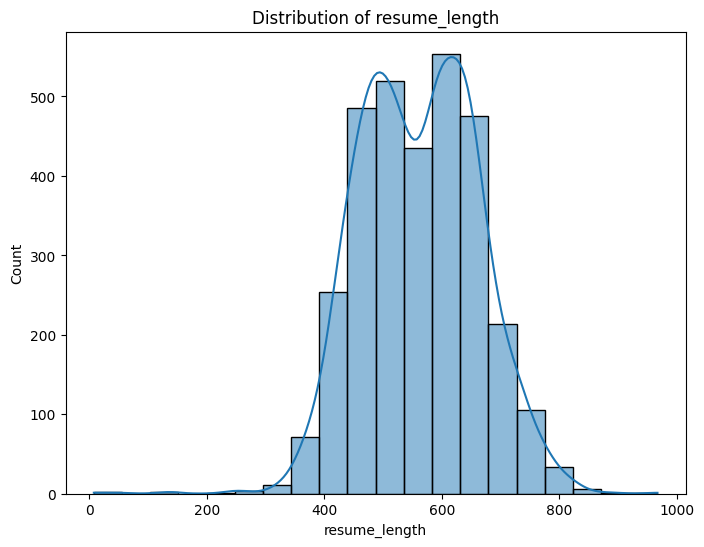

--- Summary of resume_length Distribution ---
   - Mean: 561.30
   - Median: 562.00
   - Standard Deviation: 99.26
   - The distribution of resume_length is negatively skewed.
   - resume_length appears to have a skewed distribution.
   ----------------------------------------------------



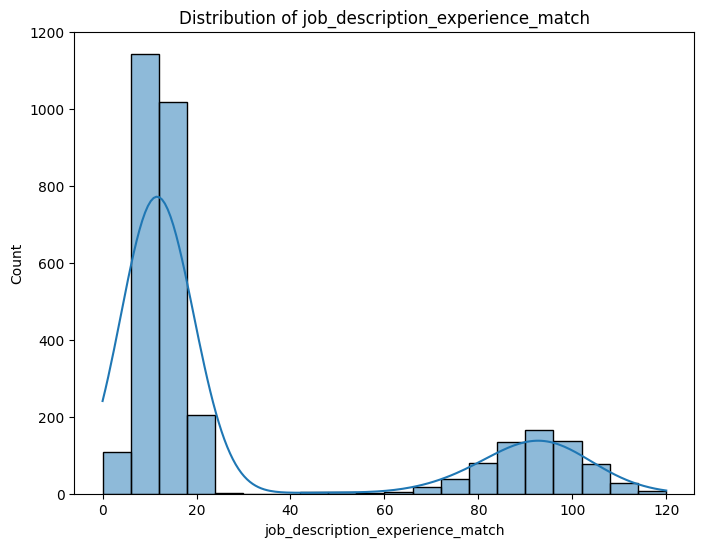

--- Summary of job_description_experience_match Distribution ---
   - Mean: 29.22
   - Median: 13.00
   - Standard Deviation: 33.47
   - The distribution of job_description_experience_match is positively skewed.
   - job_description_experience_match appears to have a skewed distribution.
   ----------------------------------------------------



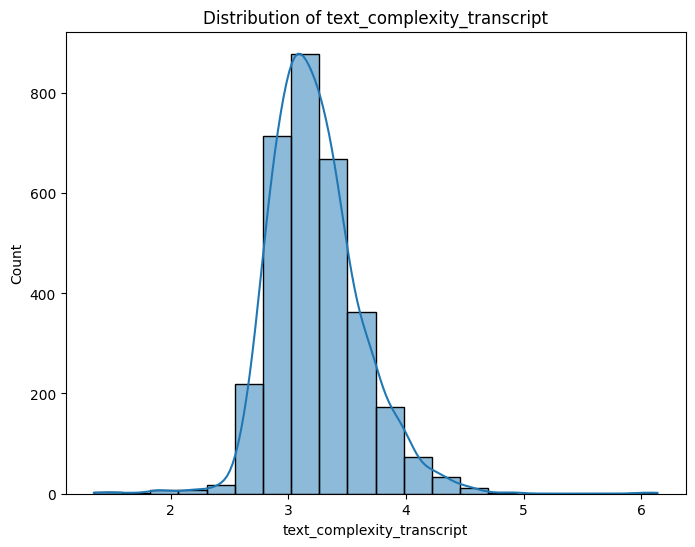

--- Summary of text_complexity_transcript Distribution ---
   - Mean: 3.23
   - Median: 3.19
   - Standard Deviation: 0.38
   - The distribution of text_complexity_transcript is positively skewed.
   - text_complexity_transcript appears to have a normal distribution.
   ----------------------------------------------------



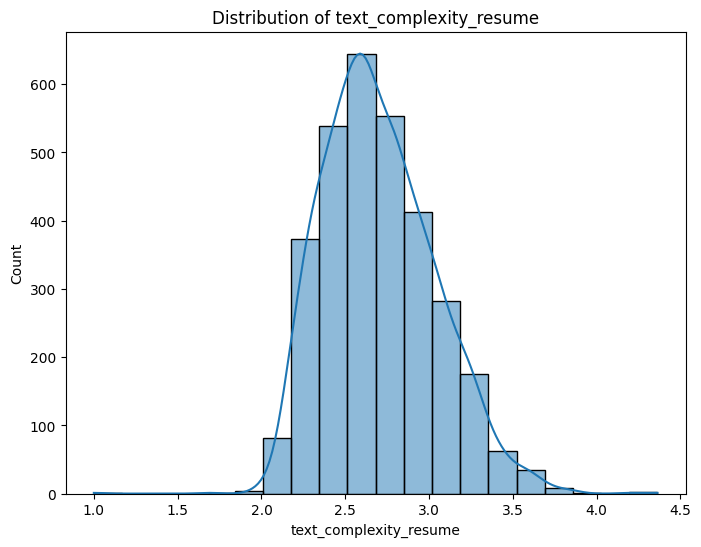

--- Summary of text_complexity_resume Distribution ---
   - Mean: 2.70
   - Median: 2.66
   - Standard Deviation: 0.33
   - The distribution of text_complexity_resume is positively skewed.
   - text_complexity_resume appears to have a normal distribution.
   ----------------------------------------------------



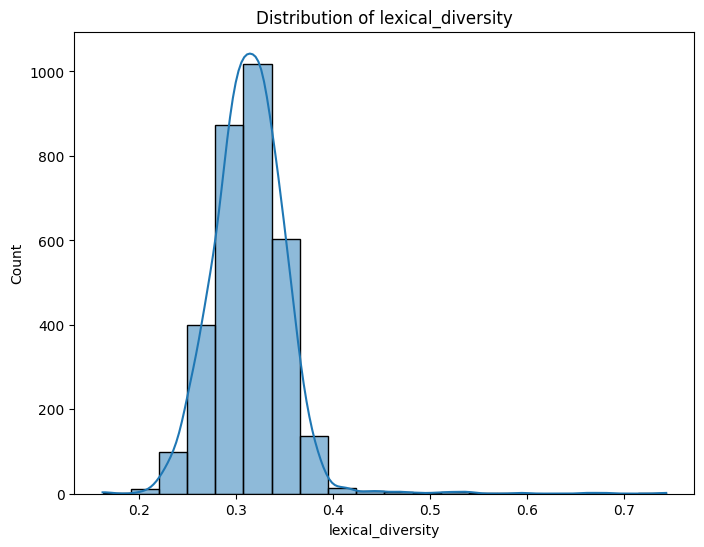

--- Summary of lexical_diversity Distribution ---
   - Mean: 0.31
   - Median: 0.31
   - Standard Deviation: 0.04
   - The distribution of lexical_diversity is positively skewed.
   - lexical_diversity appears to have a normal distribution.
   ----------------------------------------------------



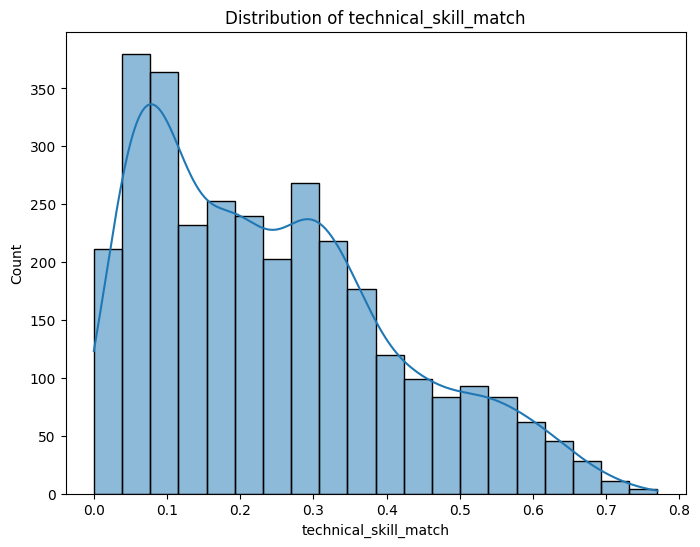

--- Summary of technical_skill_match Distribution ---
   - Mean: 0.24
   - Median: 0.22
   - Standard Deviation: 0.17
   - The distribution of technical_skill_match is positively skewed.
   - technical_skill_match appears to have a normal distribution.
   ----------------------------------------------------



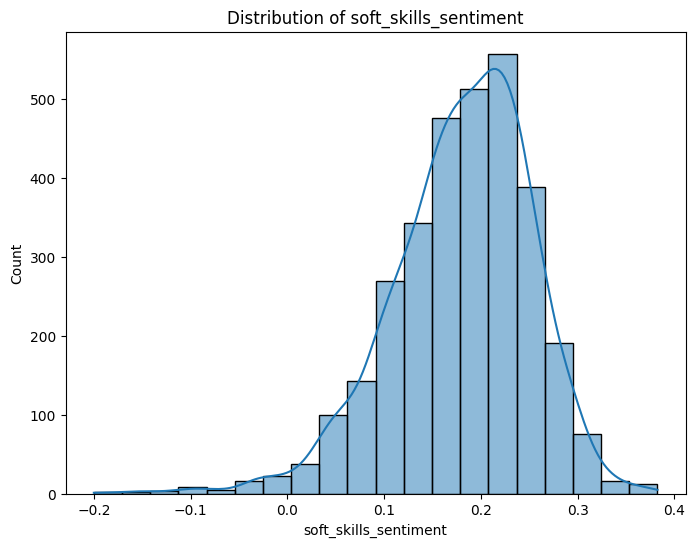

--- Summary of soft_skills_sentiment Distribution ---
   - Mean: 0.18
   - Median: 0.19
   - Standard Deviation: 0.07
   - The distribution of soft_skills_sentiment is negatively skewed.
   - soft_skills_sentiment appears to have a normal distribution.
   ----------------------------------------------------



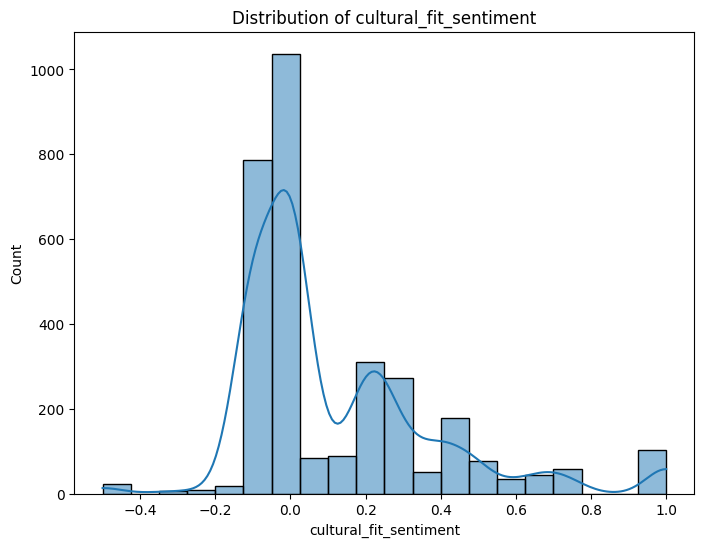

--- Summary of cultural_fit_sentiment Distribution ---
   - Mean: 0.12
   - Median: 0.00
   - Standard Deviation: 0.27
   - The distribution of cultural_fit_sentiment is positively skewed.
   - cultural_fit_sentiment appears to have a skewed distribution.
   ----------------------------------------------------



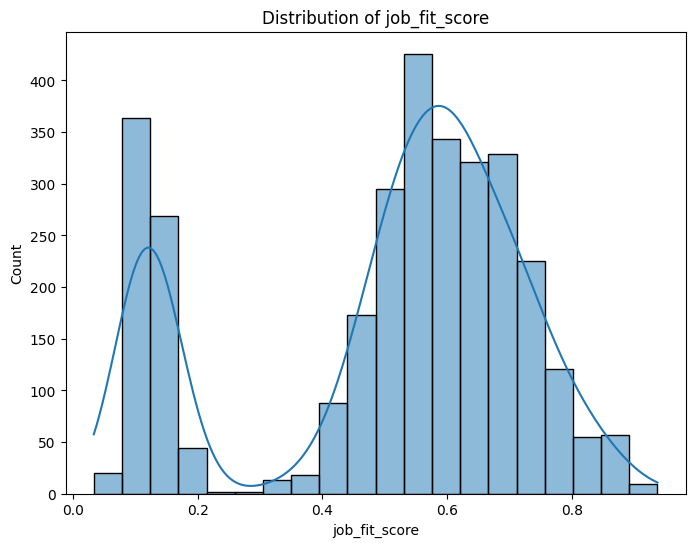

--- Summary of job_fit_score Distribution ---
   - Mean: 0.50
   - Median: 0.56
   - Standard Deviation: 0.22
   - The distribution of job_fit_score is negatively skewed.
   - job_fit_score appears to have a normal distribution.
   ----------------------------------------------------



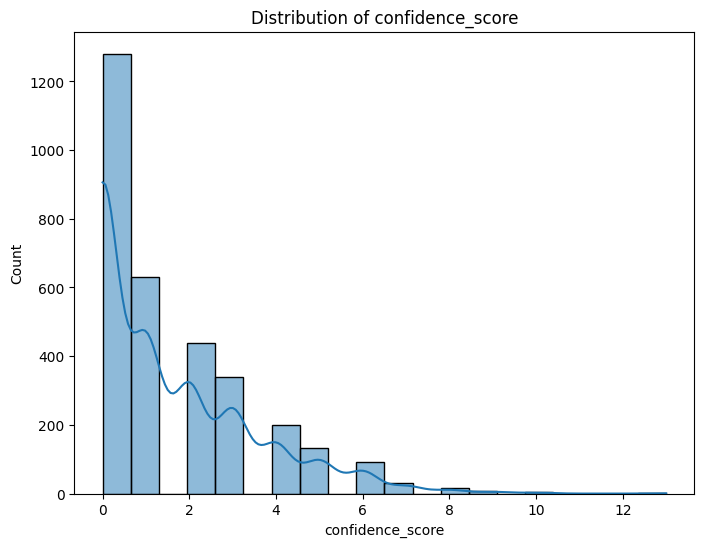

--- Summary of confidence_score Distribution ---
   - Mean: 1.57
   - Median: 1.00
   - Standard Deviation: 1.86
   - The distribution of confidence_score is positively skewed.
   - confidence_score appears to have a skewed distribution.
   ----------------------------------------------------



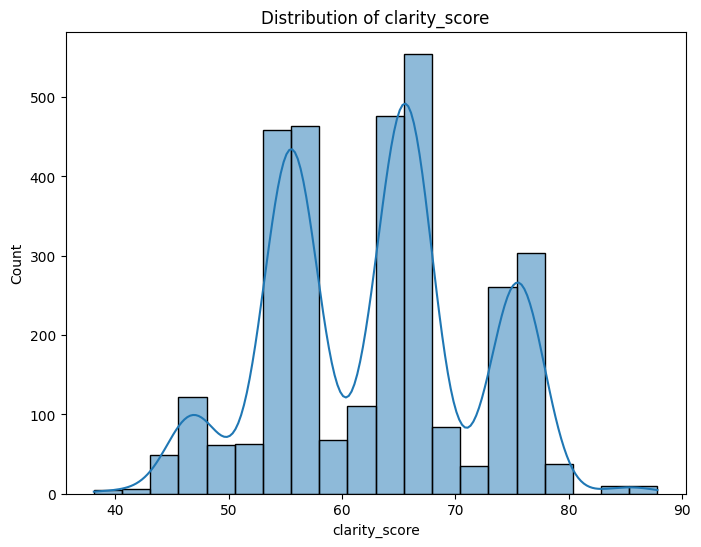

--- Summary of clarity_score Distribution ---
   - Mean: 62.83
   - Median: 64.20
   - Standard Deviation: 8.82
   - The distribution of clarity_score is negatively skewed.
   - clarity_score appears to have a skewed distribution.
   ----------------------------------------------------



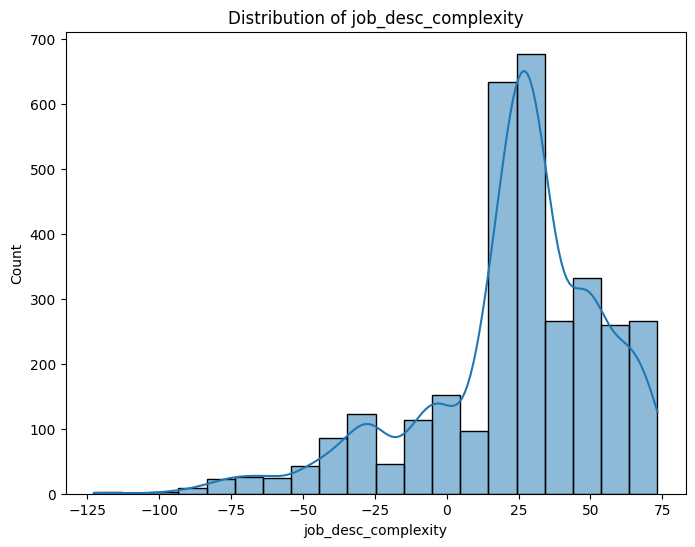

--- Summary of job_desc_complexity Distribution ---
   - Mean: 23.72
   - Median: 27.49
   - Standard Deviation: 31.28
   - The distribution of job_desc_complexity is negatively skewed.
   - job_desc_complexity appears to have a skewed distribution.
   ----------------------------------------------------



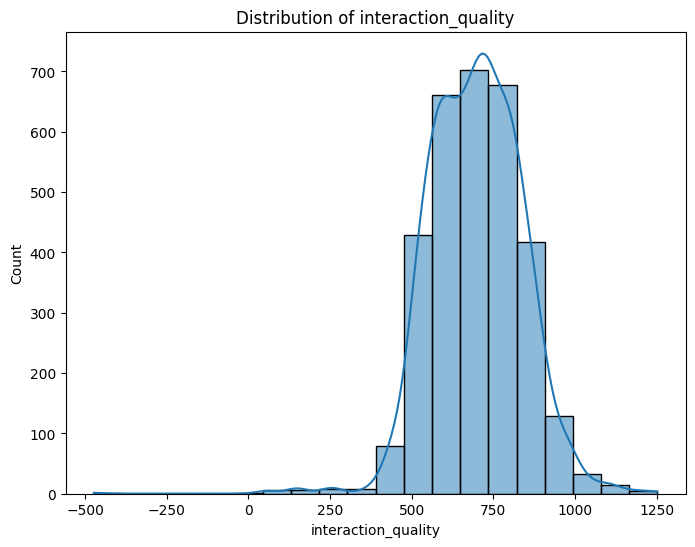

--- Summary of interaction_quality Distribution ---
   - Mean: 697.67
   - Median: 698.38
   - Standard Deviation: 140.96
   - The distribution of interaction_quality is negatively skewed.
   - interaction_quality appears to have a skewed distribution.
   ----------------------------------------------------



In [128]:
# List of numerical features to analyze
numerical_features = ['num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'transcript_length', 'resume_length',
       'job_description_experience_match', 'text_complexity_transcript',
       'text_complexity_resume', 'lexical_diversity',
       'technical_skill_match', 'soft_skills_sentiment',
       'cultural_fit_sentiment', 'job_fit_score', 'confidence_score',
       'clarity_score', 'job_desc_complexity', 'interaction_quality']

# Loop through each feature and plot its distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=20)  # Create histogram with KDE curve
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Summary of the plot
    print(f"--- Summary of {feature} Distribution ---")
    # Analyze the feature's distribution
    feature_data = data[feature]
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    std_value = feature_data.std()
    
    print(f"   - Mean: {mean_value:.2f}")
    print(f"   - Median: {median_value:.2f}")
    print(f"   - Standard Deviation: {std_value:.2f}")
    
    # Insights based on distribution (adjust based on the feature type)
    if mean_value > median_value:
        print(f"   - The distribution of {feature} is positively skewed.")
    elif mean_value < median_value:
        print(f"   - The distribution of {feature} is negatively skewed.")
    else:
        print(f"   - The distribution of {feature} is symmetric.")
    
    print(f"   - {feature} appears to have a {'normal' if abs(mean_value - median_value) < 0.1 else 'skewed'} distribution.")
    print("   ----------------------------------------------------\n")